In [188]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)
from tqdm import tqdm

In [191]:
def ratio_to_weight(df_ratio, n=2, weight=0.05):
    
    df = df_ratio.copy()
    for index, row in tqdm(df.iterrows()):
        # ticker not to take into account when weight in indice is NaN
        for ticker, value in row.items():   
            if pd.isna(indice_weight.at[index, ticker]):
                row.at[ticker] = np.nan

        all_tickers = list(row.index)
        largest_tickers = list(row.nlargest(n).index)
        smallest_tickers = list(row.nsmallest(n).index)
        other_tickers = list(set(all_tickers).difference(largest_tickers + smallest_tickers))
        df.at[index, largest_tickers] = weight
        df.at[index, smallest_tickers] = - weight
        df.at[index, other_tickers] = 0
        
    return df

In [192]:
def strategie_stats(perf_weighted):
    indice_price = 100 * (1 + perf_weighted.sum(axis=1).cumsum())
    total_return = (indice_price.iloc[-1]-indice_price.iloc[0]) / indice_price.iloc[0]
    print('total return from 2006 :', 100 * round(total_return, 2), '%')
    indice_price.plot()

In [202]:
def plot_comparison(perf_weighted1, perf_weighted2):
    indice_price1 = 100 * (1 + perf_weighted1.sum(axis=1).cumsum())
    indice_price2 = 100 * (1 + perf_weighted2.sum(axis=1).cumsum())
    indice_price = pd.concat([indice_price1, indice_price2], axis=1)
    indice_price.plot()

In [130]:
indice_weight = pd.read_excel('SW_data/Insurances.xlsx', sheet_name='raw_weight', skiprows=[1])
indice_weight.drop(columns='Unnamed: 1', inplace=True)
indice_weight_unpivot = indice_weight.melt(id_vars=['TICKER'], var_name='date', value_name='weight')
indice_weight = indice_weight.set_index('TICKER')
indice_weight.index.name = 'Dates'
indice_weight = indice_weight.T
indice_weight.index = pd.to_datetime(indice_weight.index, format='%m/%d/%Y')
indice_weight = indice_weight / 100
indice_weight.head()

Dates,BALN SW Equity,GENN SW Equity,HELN SW Equity,NATN SW Equity,CHRN SW Equity,SLHN SW Equity,RUKN VX Equity,VAHN SW Equity,ZURN SW Equity,SREN SW Equity
2005-12-30,0.0492,0.0022,0.0144,0.0053,0.0232,0.0784,0.3588,0.0015,0.4670,NaN
2006-01-31,0.0520,0.0024,0.0151,0.0055,0.0225,0.0771,0.3555,0.0015,0.4683,NaN
2006-02-28,0.0502,0.0023,0.0144,0.0053,0.0218,0.0897,0.3282,0.0014,0.4868,NaN
2006-03-31,0.0557,0.0027,0.0143,0.0058,0.0243,0.0999,0.3179,0.0015,0.4778,NaN
2006-04-28,0.0569,0.0027,0.0163,0.0057,0.0237,0.1048,0.3165,0.0016,0.4718,NaN


In [131]:
tickers_perf = pd.read_excel('SW_data/Insurances.xlsx', sheet_name='performance', skiprows=[0,1,2,4,5,6], index_col=0)
tickers_perf = tickers_perf / 100
tickers_perf.head()

,BALN SW Equity,GENN SW Equity,HELN SW Equity,NATN SW Equity,CHRN SW Equity,SLHN SW Equity,RUKN VX Equity,VAHN SW Equity,ZURN SW Equity,SREN SW Equity
2006-01-02,-0.003247,0.001475,0.011829,0.000000,0.006944,-0.009170,-0.008247,-0.014085,-0.007972,-0.008247
2006-01-03,0.001954,0.019146,0.030576,0.013846,0.020690,0.018931,0.008836,-0.026429,0.021429,0.008836
2006-01-04,0.012354,-0.008671,-0.022688,-0.013657,0.027027,0.000826,0.011850,0.027146,0.027972,0.011850
2006-01-05,-0.010918,0.026239,0.003571,0.000000,-0.016447,0.000825,-0.011202,0.007143,-0.014456,-0.011202
2006-01-06,-0.007792,0.005682,-0.001779,0.000000,0.003344,0.001649,0.009784,0.007143,-0.002588,0.009784


In [165]:
comb_ratio_nl = pd.read_excel('SW_data/Insurances.xlsx', sheet_name='COMB_RATIO_NL_raw', skiprows=[1,2]).set_index('Dates')
comb_ratio_nl.fillna(method='ffill', inplace=True)

In [166]:
incr_oper_margin = pd.read_excel('SW_data/Insurances.xlsx', sheet_name='INCREMENTAL_OPER_MARGIN_raw', skiprows=[1,2]).set_index('Dates')
incr_oper_margin.fillna(method='ffill', inplace=True)

In [167]:
cf_to_inc = pd.read_excel('SW_data/Insurances.xlsx', sheet_name='CASH_FLOW_TO_NET_INC_raw', skiprows=[1,2]).set_index('Dates')
cf_to_inc.fillna(method='ffill', inplace=True)

In [168]:
cf_to_inc = cf_to_inc.reindex(index=indice_weight.index, method='ffill')
incr_oper_margin = incr_oper_margin.reindex(index=indice_weight.index, method='ffill')
comb_ratio_nl = comb_ratio_nl.reindex(index=indice_weight.index, method='ffill')

In [193]:
for i, df in enumerate([cf_to_inc, incr_oper_margin, comb_ratio_nl]):
    ratio_weight_temp = ratio_to_weight(df)
    if i == 0:
        ratio_weight = ratio_weight_temp
    else:
        ratio_weight = ratio_weight.add(ratio_weight_temp)

189it [00:00, 503.68it/s]
189it [00:00, 599.96it/s]
189it [00:00, 578.93it/s]


In [182]:
new_weight = indice_weight.add(ratio_weight)

In [183]:
indice_weight_all = indice_weight.reindex(index=tickers_perf.index, method='ffill')
new_weight_all = new_weight.reindex(index=tickers_perf.index, method='ffill')

In [184]:
perf_weighted = tickers_perf.mul(indice_weight_all)
perf_weighted_new = tickers_perf.mul(new_weight_all)

total return from 2006 : 183.0 %


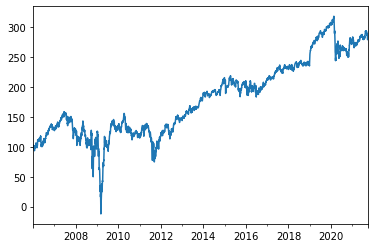

In [198]:
strategie_stats(perf_weighted)

total return from 2006 : 148.0 %


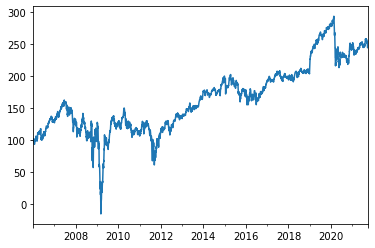

In [199]:
strategie_stats(perf_weighted_new)

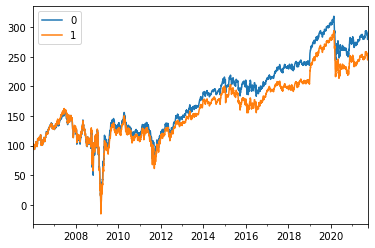

In [203]:
plot_comparison(perf_weighted, perf_weighted_new)